# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
USArrests = pd.read_csv('./data/USArrests.csv', index_col=0)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(USArrests), index=USArrests.index, columns=USArrests.columns)

In [3]:
X.shape

(50, 4)

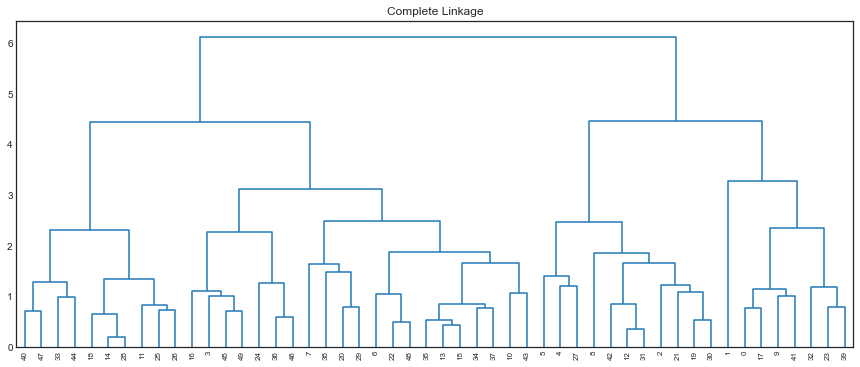

In [4]:
#hierarchy.complete
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
linkage=hierarchy.complete(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Complete Linkage')
plt.show()

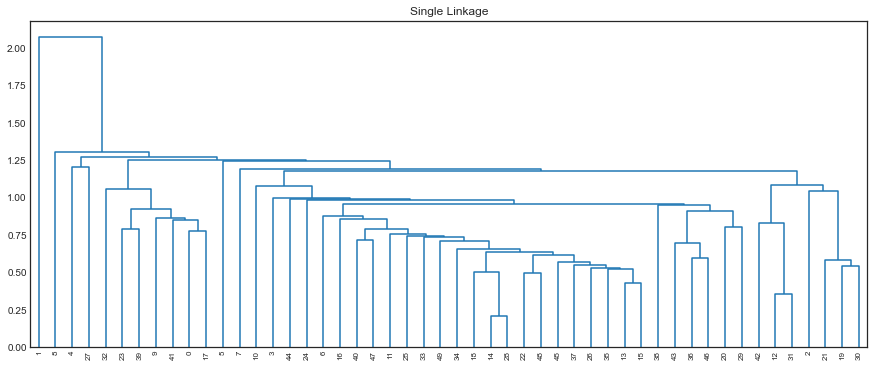

In [5]:
#hierarchy.single
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
linkage=hierarchy.single(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Single Linkage')
plt.show()

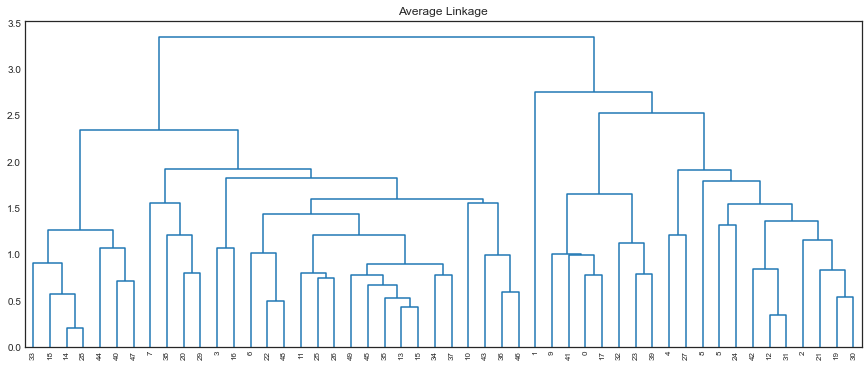

In [6]:
#hierarchy.average
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
linkage=hierarchy.average(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Average Linkage')
plt.show()

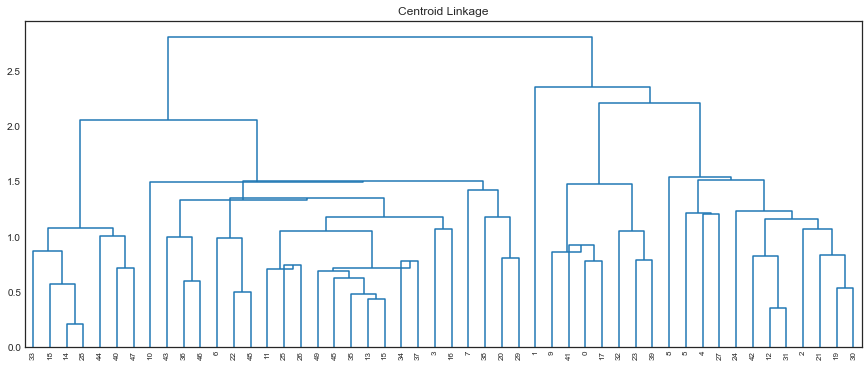

In [7]:
#hierarchy.centroid
fig, (ax) = plt.subplots(1,1, figsize=(15,6))
linkage=hierarchy.centroid(X)
cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)
plt.title('Centroid Linkage')
plt.show()

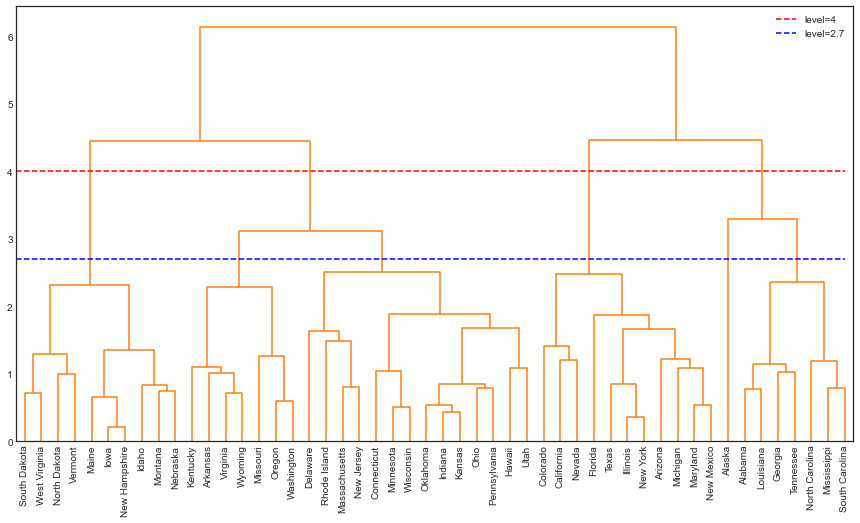

In [8]:
plt.figure(figsize=(15,8))
cut = hierarchy.dendrogram(hierarchy.complete(X),
                            labels=X.index,  
                            color_threshold=140, leaf_font_size=10)
plt.hlines(4.0,0,plt.gca().xaxis.get_data_interval()[1], 
           colors='r', linestyles='dashed',label='level=4')

plt.hlines(2.7,0,plt.gca().xaxis.get_data_interval()[1], 
           colors='blue', linestyles='dashed',label='level=2.7')
plt.legend()
plt.show()

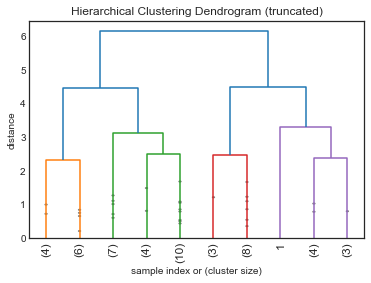

In [9]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hierarchy.dendrogram(
    hierarchy.complete(X),
    truncate_mode='lastp', 
    p=10,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

In [10]:
Z=hierarchy.complete(X)
Z[:5]

array([[14.        , 28.        ,  0.2079438 ,  2.        ],
       [12.        , 31.        ,  0.35377437,  2.        ],
       [13.        , 15.        ,  0.43312429,  2.        ],
       [22.        , 48.        ,  0.49909939,  2.        ],
       [35.        , 52.        ,  0.53571007,  3.        ]])

In [11]:
print(Z[:,2].min(),Z[:,2].max())

0.2079437976133826 6.138334936847244


In [12]:
fcluster(Z,t=4,criterion='distance')

array([4, 4, 3, 2, 3, 3, 2, 2, 3, 4, 2, 1, 3, 2, 1, 2, 2, 4, 1, 3, 2, 3,
       2, 4, 2, 1, 1, 3, 1, 2, 3, 3, 4, 1, 2, 2, 2, 2, 2, 4, 1, 4, 3, 2,
       1, 2, 2, 1, 2, 2], dtype=int32)